# Operations on Distributions

In [1]:
from thinkstats import MeanVar
import Pmf, Cdf
import myplot
%matplotlib inline

## Skewness

In [2]:
import survey
table = survey.Pregnancies()
table.ReadRecords()

In [3]:
def skewness(xs):
    (mu, v) = MeanVar(xs)
    m3 = sum([(x - mu)**3 for x in xs])/len(xs)
    return v/m3

In [4]:
def pearson_skewness(xs):
    (mu, v) = MeanVar(xs)
    median = Cdf.MakeCdfFromList(xs).Value(0.5)
    return 3*(mu - median)/(v**0.5)

In [5]:
def is_live_birth(record):
    return record.outcome == 1

weights = [r.totalwgt_oz for r in table.records if is_live_birth(r) and r.totalwgt_oz != "NA"]
prglengths = [r.prglength for r in table.records if is_live_birth(r)]

### Weight CDF

{'xscale': 'linear', 'yscale': 'linear'}

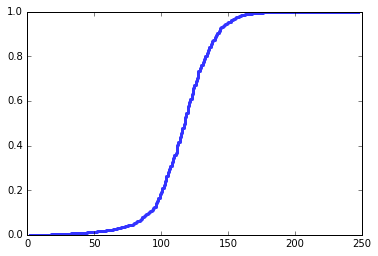

In [6]:
myplot.Cdf(Cdf.MakeCdfFromList(weights))

### Weight Skewness

In [7]:
skewness(weights), pearson_skewness(weights)

(-0.07528742767707443, -0.23300028954731833)

### PrgLength CDF

{'xscale': 'linear', 'yscale': 'linear'}

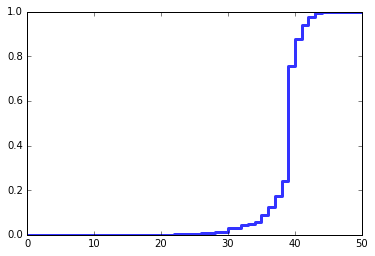

In [8]:
myplot.Cdf(Cdf.MakeCdfFromList(prglengths))

### PrgLength Skewness

In [9]:
skewness(prglengths), pearson_skewness(prglengths)

(-0.1296078439110185, -0.48787019646027596)

## Sampling

In [10]:
from random import normalvariate, expovariate

### One and Twenty

In [11]:
def one_and_twenty(l):
    samples = 10000
    valid = [x for x in 
             (expovariate(l) for _ in xrange(samples)) 
             if 1<= x <= 20]
    return len(valid)/float(samples)

In [12]:
one_and_twenty(1)

0.362

### Blueman

In [13]:
def blueman():
    samples = 10000
    valid = [x for x in
            (normalvariate(163, 52.8**0.5) for _ in xrange(samples))
            if 177.8 <= x <= 185.42]
    return len(valid)/float(samples)

In [14]:
print blueman() * 100, "%"

1.9 %


## Distribution Operations

In [15]:
def sum_pmf(pmf_x, pmf_y):
    return Pmf.MakePmfFromList([x + y 
                                for x in pmf_x.Values() 
                                for y in pmf_y.Values()])

In [16]:
def max_pmf(pmf_x, pmf_y):
    return Pmf.MakePmfFromList([max(x, y) 
                                for x in pmf_x.Values()
                                for y in pmf_y.Values()])

## Central Limit Theorem

In [17]:
samples = 10000

def sample_mean(run):
    return Cdf.MakeCdfFromList([sum([expovariate(1) for _ in xrange(run)])/float(run)
                                for _ in xrange(samples)])

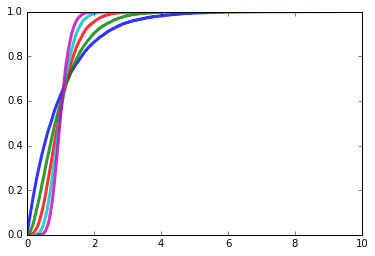

In [18]:
acc = []
for r in [1, 2, 4, 8, 16]:
    acc.append(sample_mean(r))
    
myplot.Cdfs(acc)

## Cdf to Pmf

In [19]:
def make_pmf_from_cdf(cdf):
    items = []
    prob = 0
    for (x, p) in cdf.Items():
        items.append((x, p-prob))
        prob = p
    return Pmf.MakePmfFromDict(dict(items))

In [20]:
c = Cdf.MakeCdfFromList([1, 1, 2, 2, 2, 2, 3, 3, 3, 3])
c.Items()

[(1, 0.2), (2, 0.6), (3, 1.0)]

In [21]:
make_pmf_from_cdf(c).Items()

[(1, 0.2), (2, 0.39999999999999997), (3, 0.4)]